<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Miscellaneous/Normality%20Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

19:04:35 Starting...
19:04:35 Installing yfinance into Google notebook...
19:04:40 Installing arch into Google notebook...
19:04:48 Initialized.


In [2]:
from scipy.stats import norm,gennorm,normaltest as normal_test
from itertools import product

results=pd.DataFrame()
results.index=pd.MultiIndex.from_tuples(list(product(list(range(10,1001,1)),list(np.arange(half,four,0.1)))))
results.index.names=["Sample","Beta"]

for n,beta in tqdm(results.index):
    sample=pd.Series(gennorm(beta,zero,one).rvs(n))
    results.loc[(n,beta),"Mean"]=sample.mean()
    results.loc[(n,beta),"St.Dev."]=sample.var()
    results.loc[(n,beta),"Skewness"]=sample.skew()
    results.loc[(n,beta),"Kurtosis"]=sample.kurt()+three
    results.loc[(n,beta),"Normal Test"]=normal_test((sample-sample.mean())/sample.std())[1]

for alpha in 0.05,0.01,0.001:
    results["NT %g" % (alpha*hundred)]=results["Normal Test"]<alpha

display(results)

  0%|          | 0/34685 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=1

Mean     St.Dev.  Skewness  Kurtosis   Normal Test   NT 5  \
Sample Beta                                                                  
10     0.5   1.698253  375.646105  1.357174  4.041442  9.680128e-02  False   
       0.6  -0.234724    2.513760 -1.029353  4.579283  1.523385e-01  False   
       0.7  -0.027107    3.768175 -0.834676  4.393059  2.496166e-01  False   
       0.8  -1.206511    3.527551 -1.241451  4.866777  7.798561e-02  False   
       0.9  -1.537529    5.009965 -1.930126  6.545920  3.327592e-03   True   
...               ...         ...       ...       ...           ...    ...   
1000   3.5   0.000413    0.363154 -0.000205  2.166421  1.583947e-21   True   
       3.6  -0.007766    0.363874  0.017933  2.147934  2.021420e-23   True   
       3.7  -0.022547    0.342208  0.090056  2.339853  3.252067e-10   True   
       3.8  -0.025392    0.346101  0.073499  2.182254  3.060248e-20   True   
       3.9   0.006082    0.336142 -0.030474  2.275800  3.109379e-13   True   

              NT 1  NT 0.1  
Sample Beta                 
10     0.5   False   False  
       0.6   False   False  
       0.7   False   False  
       0.8   False   False  
       0.9    True   False  
...            ...     ...  
1000   3.5    True    True  
       3.6    True    True  
       3.7    True    True  
       3.8    True    True  
       3.9    True    True  

[34685 rows x 8 columns]

19:11:35 Displaying F.P.R. with Gaussian Filter sigma=0.


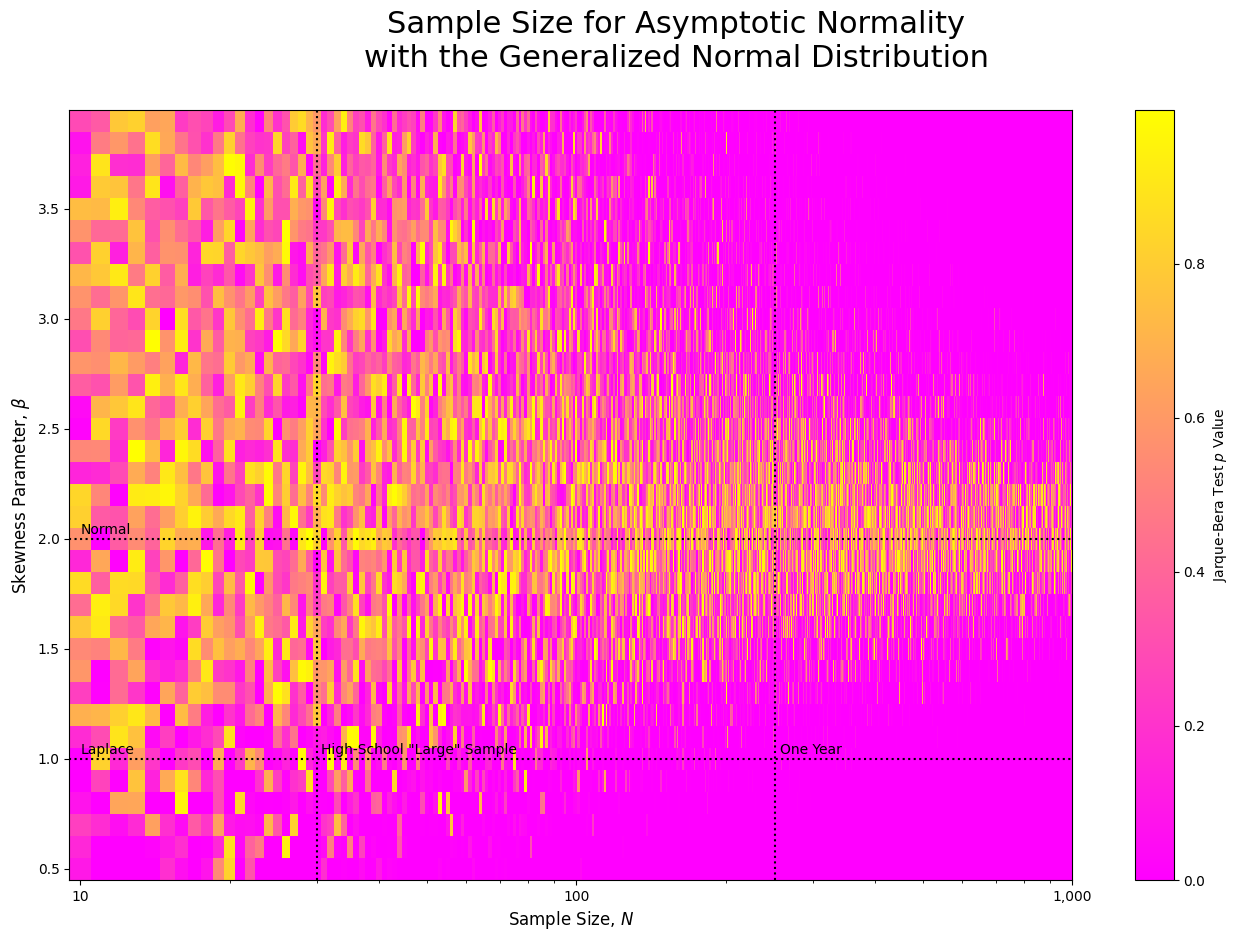

In [4]:
from scipy.ndimage import gaussian_filter
nprint("Displaying F.P.R. with Gaussian Filter sigma=%g." % (sigma:=zero))

Z=(df:=results.reset_index()).pivot_table(index="Beta",columns="Sample",values="Normal Test").values
X,Y=np.meshgrid(np.sort(df["Sample"].unique()),np.sort(df["Beta"].unique()))

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
mesh=plot.pcolormesh(X,Y,gaussian_filter(Z,sigma) if sigma else Z,cmap='spring')
plot.set_xscale('log')
plot.xaxis.set_major_formatter(CountLabels(0))
plot.set_xlabel("Sample Size, $N$",fontsize=12)
plot.set_ylabel("Skewness Parameter, $\\beta$",fontsize=12)
figure.suptitle(title:="Sample Size for Asymptotic Normality\nwith the Generalized Normal Distribution",fontsize=22)

for y,t in (two,"Normal"),(one,"Laplace"):
    plot.axhline(y,color=(c:='black'),linestyle=':')
    plot.text(X.min(),y+0.01,t,color=c,ha='left',va='bottom')

for x,t in (30,'High-School "Large" Sample'),(252,'One Year'):
    plot.axvline(x,color=c,linestyle=':')
    plot.text(x*1.02,y+0.01,t,color=c,ha='left',va='bottom')

figure.colorbar(mesh,ax=plot,label='Jarque-Bera Test $p$ Value')
figure.savefig(title.split("\n")[0]+".png",dpi=300,bbox_inches='tight')